<a href="https://colab.research.google.com/github/thomasamged/spam-detection/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import  PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.rename(columns={"v1":"type","v2":"message"},inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.drop(["Unnamed: 2", 	"Unnamed: 3" ,	"Unnamed: 4"],inplace=True,axis=1)

In [ ]:
df["message"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

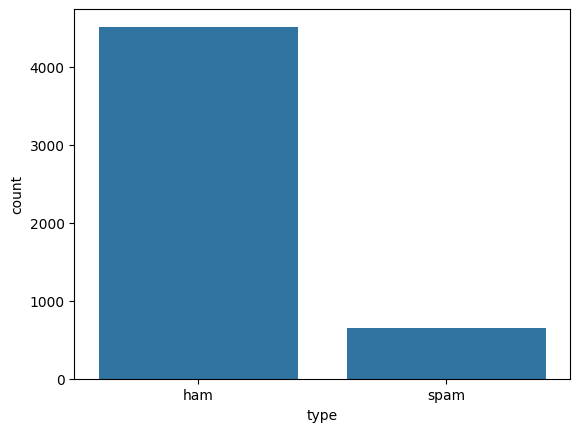

In [ ]:
sns.countplot(x=df["type"])
plt.show()

In [ ]:
ps=PorterStemmer()

In [ ]:
X=[]
ps=PorterStemmer()
for i in df["message"]:
  word=word_tokenize(i)
  word=[word for word in word if word.isalnum()]
  word=[word for word in word if word not in stopwords.words("english") and word not in string.punctuation]
  word=[ps.stem(word) for word in word]
  X.append(" ".join(word))



In [ ]:
X[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df["message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
wc = WordCloud(width = 1000, height = 500, min_font_size = 10, background_color = 'white')

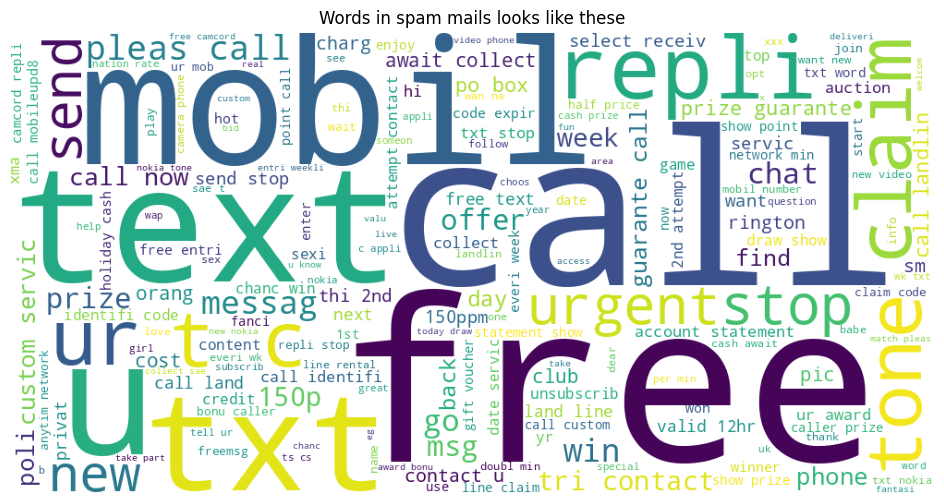

In [ ]:
spam_wc = wc.generate(df[df['type'] == "spam"]['pre_text'].str.cat(sep=" "))
plt.figure(figsize = (12,6))
plt.title('Words in spam mails looks like these')
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

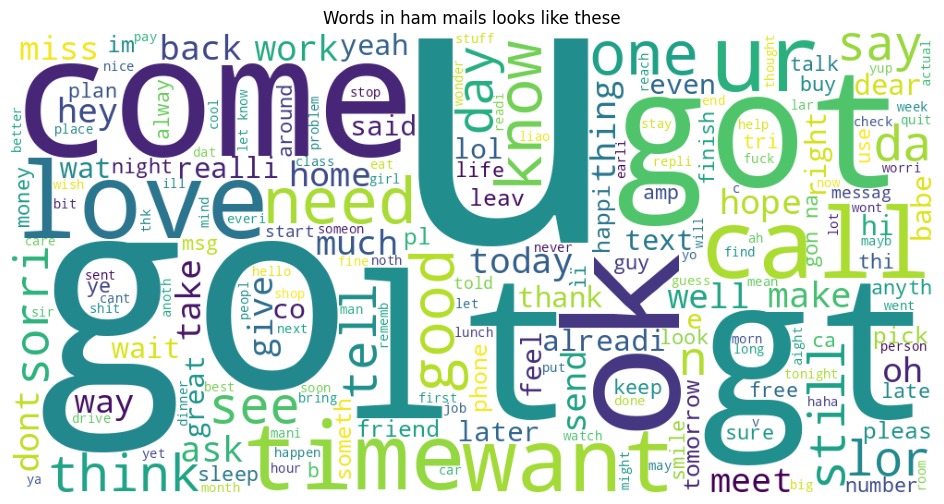

In [ ]:
ham_wc = wc.generate(df[df['type']=="ham"]["pre_text"].str.cat(sep=" "))
plt.figure(figsize = (12,6))
plt.title('Words in ham mails looks like these')
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

In [ ]:
X=np.array(X)
X.shape

(5169,)

In [ ]:
count=CountVectorizer(max_features=3000)
X_1=count.fit_transform(X).toarray()
X_1.shape

(5169, 3000)

In [ ]:
le=LabelEncoder()
y=le.fit_transform(df["type"])

In [ ]:
un=RandomUnderSampler()
X_1,y=un.fit_resample(X_1,y)
y.shape

(1306,)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y,test_size=0.2,random_state=2)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=2)

In [ ]:
mm=BernoulliNB()
mm.fit(X_train,y_train)


BernoulliNB()

In [ ]:
mm.score(X_val,y_val)

0.9521531100478469

In [ ]:
mm.score(X_test,y_test)

0.950381679389313

In [ ]:
pre=mm.predict(X_test)
pre

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
classs=classification_report(y_test,pre)
print(classs)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       130
           1       0.98      0.90      0.94       132

    accuracy                           0.94       262
   macro avg       0.95      0.94      0.94       262
weighted avg       0.95      0.94      0.94       262



In [ ]:
te="free calls for you"
te=count.transform([te]).toarray()
pr=mm.predict(te)
print(le.inverse_transform(pr))

['spam']


In [ ]:
df["pre_text"]=X
df

,type,message,pre_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,thi 2nd time tri 2 contact u pound prize 2 cla...
5568,ham,Will Ì_ b going to esplanade fr home?,will b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood so suggest
5570,ham,The guy did some bitching but I acted like i'd...,the guy bitch i act like interest buy someth e...
